### Reminder:  Clear output before saving for commit.
otherwise merging will suck.


Main project requirements:
  * few plots per question 2 per question 6-8 plots in total
  * heading for each q and summary of findings under q
  * at least 1 linear regression on at least Q4.
  


In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns 


In [2]:
file_path = 'Data/database.csv'
df = pd.read_csv(file_path, low_memory=False)  #low memory imput to avoid warning message
df.info()
# column notes:
# Species Quantity values: '1', '2-10', nan, '11-100', 'Over 100' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [3]:
subset_df = df[["Incident Year","Incident Month","Airport","Airport ID", "State","Aircraft","Aircraft Type", "Flight Phase", "Species Name","Species ID","Species Quantity"]]
subset_df.to_csv("Data/data_subset.csv")


# Which bird is the most dangerous 1990-2014?

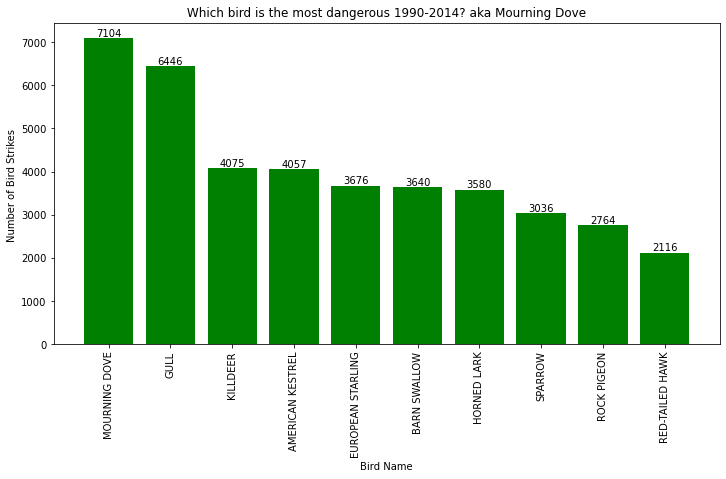

In [4]:
#removing "unknown" bird species, removing partial year data for 2015
birdType_df = subset_df[["Species Name","Species ID","Species Quantity"]].loc[(subset_df["Species Name"]!= "UNKNOWN MEDIUM BIRD") & (subset_df["Species Name"]!= "UNKNOWN SMALL BIRD") 
                                                                              & (subset_df["Species Name"]!= "UNKNOWN LARGE BIRD") & (subset_df["Species Name"]!= "UNKNOWN BIRD")
                                                                              & (subset_df["Incident Year"]!= 2015)]


# todo add labels, pretty up.  add thoughts on results
birdCounts = birdType_df["Species Name"].value_counts()

y_axis = birdCounts[:10]  
x_axis = birdCounts.index[:10]

plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color = "green")
plt.tight_layout()  
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,birdCounts.index[:10], rotation="vertical")

plt.xlabel('Bird Name') # Label the x axis 
plt.ylabel("Number of Bird Strikes ")  # Label the y axis
plt.title(" Which bird is the most dangerous 1990-2014? aka Mourning Dove ")

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

plt.savefig("Images/DangerousMourningDove.png") # TODO The legend and axis names are put in the saved image.


plt.show()


#### Which airport or geographic area is more likely to have a bird/plane strike?
    * get fancy add google figure w/heat map possibly
    * Graph for states, or stacked one of all airports grouped by state


In [5]:
subset_df

,Incident Year,Incident Month,Airport,Airport ID,State,Aircraft,Aircraft Type,Flight Phase,Species Name,Species ID,Species Quantity
0,1990,1,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KCVG,KY,B-757-200,A,CLIMB,GULL,NE1,1
1,1990,1,LIHUE ARPT,PHLI,HI,DC-9,A,TAKEOFF RUN,HOUSE SPARROW,ZZ201,1
2,1990,1,LIHUE ARPT,PHLI,HI,UNKNOWN,NaN,NaN,BARN OWL,R1101,1
3,1990,1,MYRTLE BEACH INTL,KMYR,SC,A-10A,A,APPROACH,UNKNOWN MEDIUM BIRD,UNKBM,1
4,1990,1,JACKSONVILLE INTL,KJAX,FL,F-16,A,CLIMB,FINCH,ZX,1
...,...,...,...,...,...,...,...,...,...,...,...
174099,2015,9,NaN,UNKN,NaN,B-737-700,A,NaN,UNKNOWN SMALL BIRD,UNKBS,1
174100,2015,9,DALLAS LOVE FIELD ARPT,KDAL,TX,B-737-700,A,APPROACH,UNKNOWN SMALL BIRD,UNKBS,1
174101,2015,9,MIAMI INTL,KMIA,FL,CITATIONJET,A,CLIMB,TURKEY VULTURE,K1002,1
174102,2015,9,PORTLAND INTL (OR),KPDX,OR,DHC8 DASH 8,A,DESCENT,HERMIT THRUSH,Z6014,1


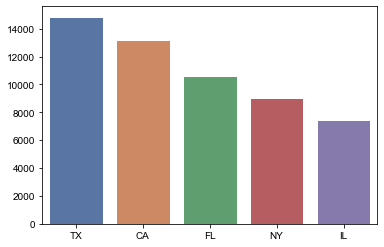

In [6]:
# Jag's \/\/\/
subset_df["State"].value_counts().head(10)

# Get the numnber of occurances of each state
state_counts = df.State.value_counts()

# Split and Save the state names in a variable
states = state_counts.index

# Split and Save the counts in another variable
counts = state_counts.values

# Create barplot object
barplot = sns.barplot(x=states, y=counts)

sns.set(rc={'figure.figsize':(15,6)})
barplot = sns.barplot(x=states[:5], y=counts[:5])


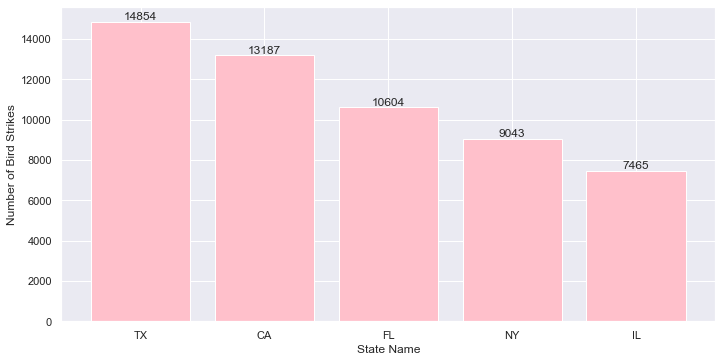

In [7]:
# Jag's ^^^




# todo add labels, pretty up.  add thoughts on results
stateCounts = subset_df["State"].value_counts()
stateCounts

y_axis = stateCounts[:5]  
x_axis = stateCounts.index[:5]

plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color = "pink")
plt.tight_layout()  
plt.xlabel('State Name')
plt.ylabel("Number of Bird Strikes")
 

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')


plt.show()


In [8]:
# Selom \/\/\/ - Bird strikes that are increasing or decreasing over time? - 

# subset_df = df[["Incident Year", "Incident Month", "Species Quantity","Radome Strike",
#                              "Windshield Strike","Nose Strike","Engine1 Strike", "Engine2 Strike",
#                              "Engine3 Strike","Engine4 Strike", "Propeller Strike", "Wing or Rotor Strike",
#                              "Fuselage Strike","Landing Gear Strike", "Tail Strike", "Lights Strike", "Other Strike"]]
# subset_df.to_csv("Data/data_subset.csv")

# Frequency of strikes (by year)
all_strikes = ["Radome Strike","Windshield Strike","Nose Strike","Engine1 Strike", "Engine2 Strike",
                "Engine3 Strike","Engine4 Strike", "Propeller Strike", "Wing or Rotor Strike",
                "Fuselage Strike","Landing Gear Strike", "Tail Strike", "Lights Strike", "Other Strike"]
all_strikes = df[["Incident Year","Airport"]].loc[subset_df["Incident Year"]!= 2015]
data_table = all_strikes.groupby("Incident Year").count()
data_table




,Airport
Incident Year,
1990,2099
1991,2672
1992,2816
1993,2849
1994,2938
1995,2989
1996,3215
1997,3651
1998,4131


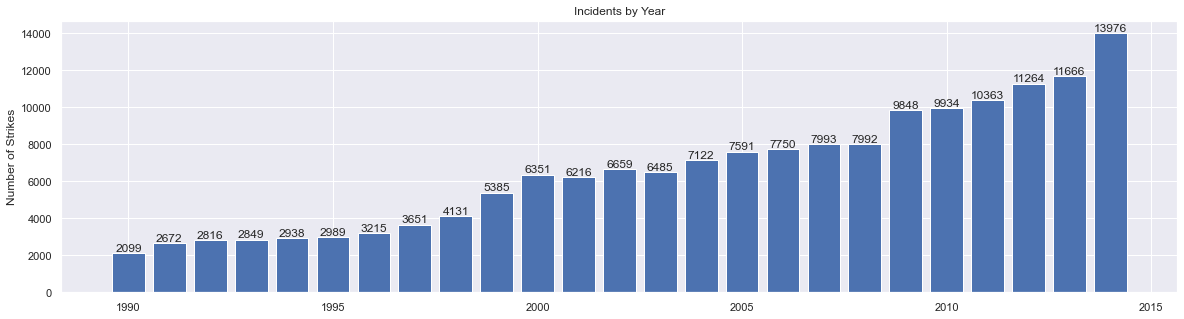

In [9]:
# Incidents (strikes) by month
x_axis = data_table.index
y_axis = data_table["Airport"]
plt.figure(figsize=(20,5))
plt.bar(x_axis, y_axis)
plt.title("Incidents by Year")
plt.ylabel("Number of Strikes")
plt.plot(color="#20F216")

y_list = list(y_axis)


for i in range(len(y_list)):
    plt.annotate(str(y_list[i]), xy=(x_axis[i],y_list[i]), ha='center', va='bottom')




plt.show()

In [10]:
#TODO need to clean up this file's first cells and delete the duplicate code from file 1 that builds subset df and just read in the subset df
# Alyssa  \/\/\/ Which phase of the flight reports the most bird strikes?



In [11]:
#create animal kingdom column in dataframe and populate it for birds/mammals/reptiles involved in airplane incidents.
subset_wkingdom_df = subset_df
#most things in the list are birds, set everything to bird intially
subset_wkingdom_df["Animal_Kingdom"]= "BIRD"
#mammals have species id that starts w/1
subset_wkingdom_df["Animal_Kingdom"]= np.where(subset_wkingdom_df['Species ID'].str.startswith('1',na=False), "MAMMAL",subset_wkingdom_df["Animal_Kingdom"])
#repiles start with 2
subset_wkingdom_df["Animal_Kingdom"]= np.where(subset_wkingdom_df['Species ID'].str.startswith('2',na=False), "REPTILE",subset_wkingdom_df["Animal_Kingdom"])
subset_wkingdom_df.to_csv("Data/data_subset_wKingdom.csv")


C:\Users\jagno\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jagno\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jagno\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [12]:
#checkout breakdown as %s
subset_wkingdom_df["Animal_Kingdom"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

BIRD       96.9%
MAMMAL      3.0%
REPTILE     0.1%
Name: Animal_Kingdom, dtype: object

## Which phase of the flight reports the most animal strikes?
todo add a bunch of stuff to discuss this q here

Vocab: 
Approach – The phase of flight when the pilot intends to land on the runway. There are different types of approaches, depending on whether the pilot is flying VFR or IFR.

Climb – The act of increasing aircraft altitude, typically to a designated level.

Descent – The act of decreasing aircraft altitude, typically to a designated level.

en Route – In air traveling to a destination.

landing roll- the movement of an aircraft from touchdown through deceleration to taxi speed or full stop.

takeoff run - The distance traveled by an airplane from the commencement of takeoff to the point when it leaves the ground or water.
https://epicflightacademy.com/aviation-terminology/

In [13]:
subset_df["Flight Phase"].value_counts()
flightphase= subset_df.groupby(['Flight Phase'])
flightphase = flightphase['Incident Year'].count().reset_index().rename(columns={"Incident Year":"Count"})
flightphase = flightphase.sort_values(by='Count',ascending=False).reset_index(drop = True)
#print(flightphase.Count.sum())  check count of sum == the total of non-NaN rows for flight phase 118802
print("Total rows that contain Flight Phase data: "+str(df["Flight Phase"].notnull().sum()))  #118802 rows have flight phase data
#len(df[df["Flight Phase"].isna()])+df["Flight Phase"].notnull().sum() #55302 rows have no flight phase + 118802 = 174104 total rows from orig dataset

#the bottom 6 parts of flight make up only ~1% of the total, so pulled those together to new category "Other"
others_label=flightphase["Flight Phase"][6:]
others_total=flightphase.Count[6:].sum()
new_row = {'Flight Phase':'OTHER', 'Count':others_total}
#append row to the dataframe
flightphase = flightphase.append(new_row, ignore_index=True)
#reorder to move "other" row up to index 6
flightphase = flightphase.sort_values(by='Count',ascending=False).reset_index(drop = True)


Total rows that contain Flight Phase data: 118802


In [14]:
#figure out how to make others label into simple text list  TODO
print(list(others_label))
olist=list(others_label)
#for label in others_label:
#    print(label)
#join makes things a string, between every item, tell it what to put inbetween before the join
print(f"Other category includes the following: {', '.join(olist)}")

['LANDING', 'TAXI', 'DEPARTURE', 'LOCAL', 'ARRIVAL', 'PARKED']
Other category includes the following: LANDING, TAXI, DEPARTURE, LOCAL, ARRIVAL, PARKED


Text(0.5, 1.0, 'What phase of flight sustains the most animal strikes')

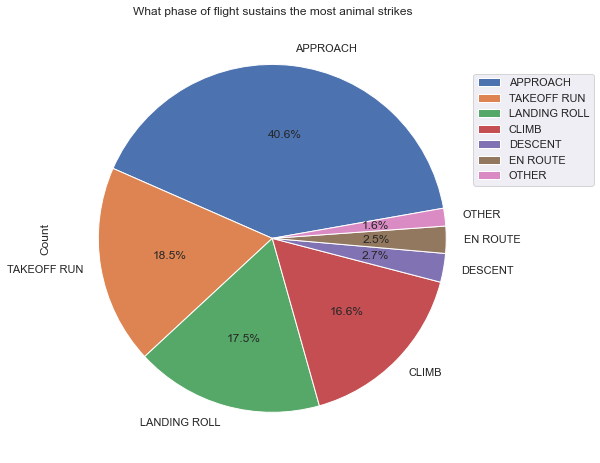

In [15]:
#plot data
pieLabels = flightphase["Flight Phase"][0:7]
#todo get the "count" out of there.
pies = flightphase[0:7].plot.pie(y="Count",figsize=[10, 8],labels=pieLabels,autopct='%1.1f%%',startangle=10)
pies.set_aspect('equal')
pies.legend(loc='center left', bbox_to_anchor=(.95, .75)) #move legend off the pie
plt.title("What phase of flight sustains the most animal strikes")
#todo maybe compare this against injuries/fatalities?

In [16]:
#plotting by animal kingdom not so iteresting since it's only 3% other
#subset_wkingdom_df.loc[subset_wkingdom_df["Flight Phase"].isin(["APPROACH","TAKEOFF RUN","LANDING ROLL","CLIMB"])].groupby(['Flight Phase', 'Animal_Kingdom']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))
#subset_wkingdom_df.groupby(['Flight Phase', 'Animal_Kingdom']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))
#df.info()
df["Flight Phase"].value_counts()
print(df.shape)  #
df[df["Flight Phase"].isna()]  #55302 rows have no flight phase?


(174104, 66)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,129735,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,129736,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,129737,1990,1,6,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
11,129738,1990,1,8,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174087,366049,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174088,366593,2015,9,30,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
174090,366047,2015,9,30,JIA,PSA AIRLINES,CRJ900,A,188,17,...,1,0,0,0,0,0,0,0,0,0
174096,365835,2015,9,30,ENY,ENVOY AIR,EMB-145,A,332,14,...,0,0,0,0,0,0,0,0,1,0


In [17]:
#todo make another chart to show phase of flight vs. injury/fatality
#drop the rows that don't have injury or fatality

injuryFatality_df = df[['Flight Phase','Injuries', 'Fatalities','Record ID']]  #narrow the column list
injuryFatality_df = injuryFatality_df[injuryFatality_df['Flight Phase'].notna()]  #drop rows w/NaN flight phase 118802 remaining
#drop rows where both injury and fatality are NaN.(ie keep rows that have either a nonna injury or non-na fatality)
injuryFatality_df = injuryFatality_df[(injuryFatality_df['Injuries'].notna()) | (injuryFatality_df['Fatalities'].notna()) ]
#another way to do the same thing below:
#injuryFatality_df =injuryFatality_df.dropna(axis =0, subset=['Injuries', 'Fatalities'], how='all') #drop if both injuries and fatalities are nan
print(injuryFatality_df.shape) #787 rows the subset way
injuryFatality_df=injuryFatality_df.fillna(0) #fill remaining nas w/0s

#keep only rows that have fatality or injury > 0
injuryFatality_df = injuryFatality_df[(injuryFatality_df['Injuries'] > 0) | (injuryFatality_df['Fatalities'] > 0) ]
print(injuryFatality_df.shape)  #down to 237 rows

#injuryFatality_df[['Flight Phase','Injuries', 'Fatalities']].sort_values(by="Fatalities", ascending=False)
inj_fat_gb=injuryFatality_df.groupby(['Flight Phase','Injuries', 'Fatalities']).count().rename(columns={"Record ID":"Count"})
inj_fat_gb#.plot(kind="bar")  #todo  graph this some how

(787, 4)
(237, 4)


Count
Flight Phase Injuries Fatalities       
APPROACH     1.0      0.0            38
             2.0      0.0             8
             7.0      0.0             1
CLIMB        0.0      5.0             1
             1.0      0.0            21
             2.0      0.0             6
             100.0    0.0             1
DESCENT      0.0      1.0             1
             1.0      0.0            13
             2.0      0.0             3
EN ROUTE     0.0      1.0             5
                      2.0             3
             1.0      0.0            86
                      8.0             1
             2.0      0.0            14
             3.0      0.0             1
             5.0      0.0             1
LANDING ROLL 0.0      1.0             1
             1.0      0.0            10
             2.0      0.0             5
LOCAL        2.0      0.0             1
TAKEOFF RUN  1.0      0.0             7
             2.0      0.0             4
             4.0      0.0             2
             5.0      0.0             1
             7.0      0.0             1
TAXI         1.0      0.0             1

## Where on the aircraft most likely to get damages during a strike? 
somethingsomething 
Figure out how likely animal strike is to result in damage

In [18]:
damage_subset_df = df[["Airport ID","Species Quantity","Fatalities","Injuries","Aircraft Damage","Radome Strike","Radome Damage","Windshield Strike","Windshield Damage","Nose Strike","Nose Damage","Engine1 Strike","Engine1 Damage","Engine2 Strike","Engine2 Damage","Engine3 Strike","Engine3 Damage","Engine4 Strike","Engine4 Damage","Engine Ingested","Propeller Strike","Propeller Damage","Wing or Rotor Strike","Wing or Rotor Damage","Fuselage Strike","Fuselage Damage","Landing Gear Strike","Landing Gear Damage","Tail Strike","Tail Damage","Lights Strike","Lights Damage","Other Strike","Other Damage"]]


In [19]:
#futzing cell
print(damage_subset_df["Fatalities"].unique())
print(damage_subset_df["Injuries"].unique())
damage_subset_df["Aircraft Damage"].value_counts().to_frame()
damage_subset_df["Fatalities"].value_counts().to_frame()
df.loc[df["Fatalities"]==5.0]

[nan  1.  2.  0.  5.  8.]
[ nan   1.   2.   7.   5.   4.   3. 100.]


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
89477,260583,2008,3,4,BUS,BUSINESS,CITATION,A,226,31,...,0,1,0,1,1,1,0,1,0,0


In [20]:
stk_dmg_totals =damage_subset_df[["Radome Strike","Radome Damage","Windshield Strike","Windshield Damage","Nose Strike","Nose Damage","Engine1 Strike","Engine1 Damage","Engine2 Strike","Engine2 Damage","Engine3 Strike","Engine3 Damage","Engine4 Strike","Engine4 Damage","Engine Ingested","Propeller Strike","Propeller Damage","Wing or Rotor Strike","Wing or Rotor Damage","Fuselage Strike","Fuselage Damage","Landing Gear Strike","Landing Gear Damage","Tail Strike","Tail Damage","Lights Strike","Lights Damage","Other Strike","Other Damage"]].sum()
stk_dmg_totals = stk_dmg_totals.to_frame()
stk_dmg_totals.rename(columns={0:"Count"}, inplace =True)  #rename column

Text(0.5, 1.0, 'Where on the plane sustains the most animal strikes? (top 10 graphed)')

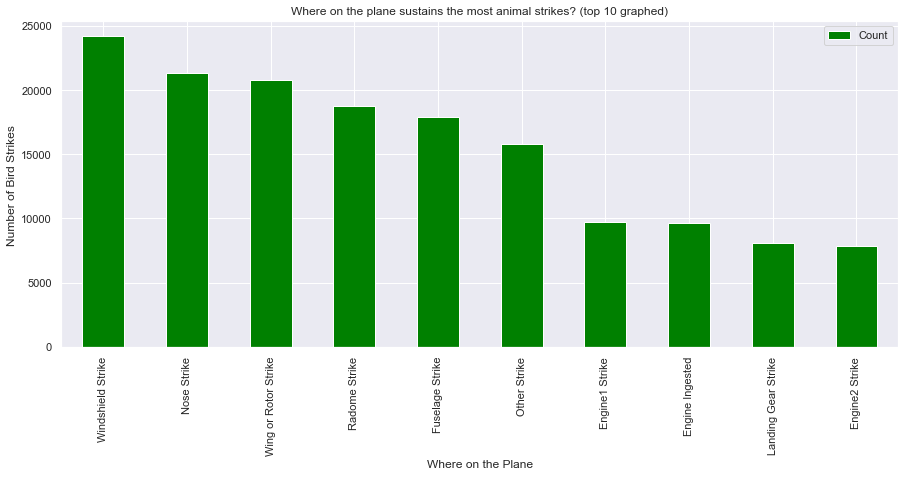

In [21]:
orderd_stk_dmg=stk_dmg_totals.sort_values("Count",ascending=False)


#graph the top 10 places to be struck TODO make pretty
# graph the top 10 places to receive damage  todo make pretty
# figure out % of strikes resulting in damage. graph this
#TODO figure out % of strikes resuling in injuries or fatalities

#plot the top 10 places on a the plan struck by animals
orderd_stk_dmg[0:10].plot(kind="bar", color="green")
plt.xlabel('Where on the Plane') # Label the x axis 
plt.ylabel("Number of Bird Strikes ")  # Label the y axis
plt.title("Where on the plane sustains the most animal strikes? (top 10 graphed)")

Text(0.5, 1.0, 'Where on the plane sustains damamge from animal strikes? (top 10 graphed)')

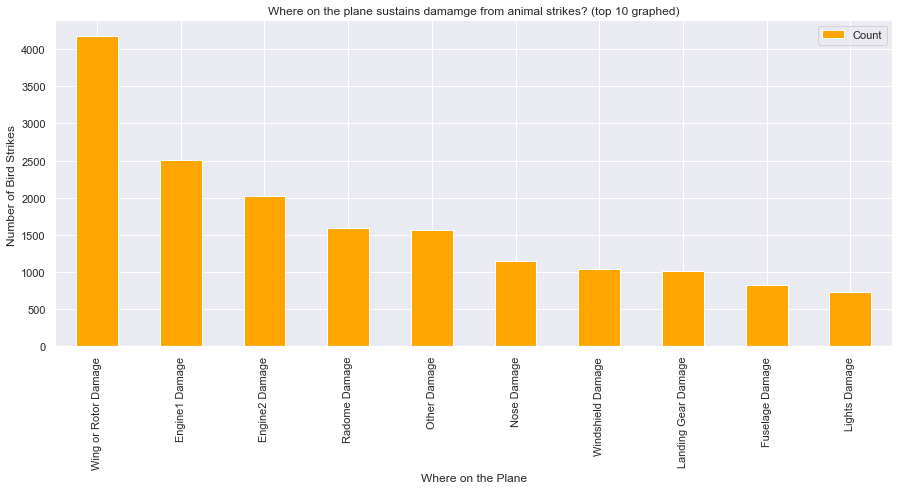

In [22]:
dmg_only = stk_dmg_totals.loc[stk_dmg_totals.index.str.contains('Damage')].sort_values("Count",ascending=False)

#plot the top 10 places that reported damage from the animal strike
dmg_only[0:10].plot(kind="bar", color="orange")
plt.xlabel('Where on the Plane') # Label the x axis 
plt.ylabel("Number of Bird Strikes ")  # Label the y axis
plt.title("Where on the plane sustains damamge from animal strikes? (top 10 graphed)")

In [23]:
damage_pct=orderd_stk_dmg  #made a copy, but it's just a new name for smae thing and "both" are getting updated

In [24]:
# calculate the % of strikes that caused damage for the top 10 parts of plane to be hit
damage_pct["StrikeDamage%"] = 0.00
damage_pct.at['Radome Strike','StrikeDamage%'] = damage_pct.at['Radome Damage','Count']/damage_pct.at['Radome Strike','Count']*100
damage_pct.at['Windshield Strike','StrikeDamage%'] = damage_pct.at['Windshield Damage','Count']/damage_pct.at['Windshield Strike','Count']*100
damage_pct.at['Nose Strike','StrikeDamage%'] = damage_pct.at['Nose Damage','Count']/damage_pct.at['Nose Strike','Count']*100
damage_pct.at['Wing or Rotor Strike','StrikeDamage%'] = damage_pct.at['Wing or Rotor Damage','Count']/damage_pct.at['Wing or Rotor Strike','Count']*100
damage_pct.at['Fuselage Strike','StrikeDamage%'] = damage_pct.at['Fuselage Damage','Count']/damage_pct.at['Fuselage Strike','Count']*100
damage_pct.at['Other Strike','StrikeDamage%'] = damage_pct.at['Other Damage','Count']/damage_pct.at['Other Strike','Count']*100
damage_pct.at['Engine1 Strike','StrikeDamage%'] = damage_pct.at['Engine1 Damage','Count']/damage_pct.at['Engine1 Strike','Count']*100
damage_pct.at['Landing Gear Strike','StrikeDamage%'] = damage_pct.at['Landing Gear Damage','Count']/damage_pct.at['Landing Gear Strike','Count']*100
damage_pct.at['Engine2 Strike','StrikeDamage%'] = damage_pct.at['Engine2 Damage','Count']/damage_pct.at['Engine2 Strike','Count']*100
damage_pct.at['Lights Strike','StrikeDamage%'] = damage_pct.at['Lights Damage','Count']/damage_pct.at['Lights Strike','Count']*100
damage_pct.sort_values("StrikeDamage%",ascending=False, inplace=True)  #order the df by % just calculated

Overall 9.41% Animal strikes resulted in damage to the aircraft.


Text(0.5, 1.0, 'What Percent of strikes result in damage to the plane? (top 10 graphed)')

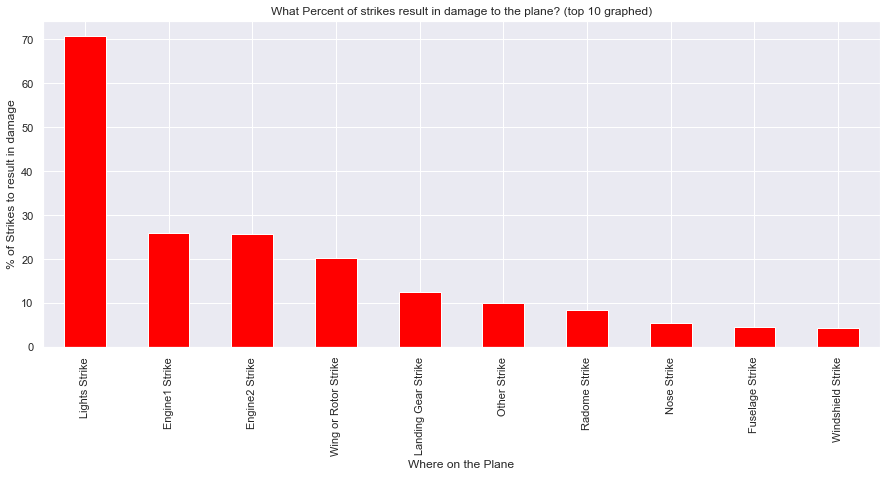

In [25]:
overallDamage_v_strikes = damage_subset_df["Aircraft Damage"].value_counts().to_frame()
pct = round(overallDamage_v_strikes.loc[1]/overallDamage_v_strikes.loc[0]*100,2)
print(f"Overall {pct[0]}% Animal strikes resulted in damage to the aircraft." )
#plot percent of strikes that resulted in damage
damage_pct["StrikeDamage%"][0:10].plot(kind="bar",color="red")
#damage_pct_orderd#= damage_pct.sort_values("StrikeDamage%",ascending=False)
#damage_pct_orderd
plt.xlabel('Where on the Plane') # Label the x axis 
plt.ylabel("% of Strikes to result in damage")  # Label the y axis
plt.title("What Percent of strikes result in damage to the plane? (top 10 graphed)")

In [26]:
# Alyssa ^^^
subset_wkingdom_df.groupby(['Flight Phase', 'Animal_Kingdom'])
subset_wkingdom_df.loc[subset_df["Species ID"].str.startswith('1',na=False)]

#subset_df.loc[subset_df["Species Name"] == "Moose"]

,Incident Year,Incident Month,Airport,Airport ID,State,Aircraft,Aircraft Type,Flight Phase,Species Name,Species ID,Species Quantity,Animal_Kingdom
12,1990,1,JOHN C TUNE ARPT,KJWN,TN,HAWKER-SDLY HS125,A,TAKEOFF RUN,WHITE-TAILED DEER,1G11,2-10,MAMMAL
20,1990,1,JACK BARSTOW,KIKW,MI,PA-28,A,LANDING ROLL,WHITE-TAILED DEER,1G11,1,MAMMAL
26,1990,1,ST. PAUL DOWNTOWN ARPT/HOLMAN FIELD,KSTP,MN,LEARJET-25,A,LANDING ROLL,WHITE-TAILED DEER,1G11,1,MAMMAL
56,1990,2,ROBT J MILLER AIR PARK,KMJX,NJ,PA-28,A,LANDING ROLL,WHITE-TAILED DEER,1G11,1,MAMMAL
98,1990,3,PRIVATE AIR STRIP,PVT,CA,PA-J3,A,LANDING ROLL,MULE DEER,1G12,1,MAMMAL
...,...,...,...,...,...,...,...,...,...,...,...,...
173990,2015,9,NaN,UNKN,NaN,CRJ700,A,NaN,VESPER BAT,1C21,1,MAMMAL
173992,2015,9,EL PASO INTL ARPT,KELP,TX,UNKNOWN,NaN,NaN,BLACK-TAILED JACKRABBIT,1D11,1,MAMMAL
173995,2015,9,RICHMOND INTL,KRIC,VA,CIRRUS SR 20/22,A,APPROACH,COYOTE,1F11,NaN,MAMMAL
174021,2015,9,NEWARK LIBERTY INTL ARPT,KEWR,NJ,DHC8 DASH 8,A,APPROACH,RED BAT,1C2101,1,MAMMAL
